<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from prophet import Prophet
from pandas.tseries.offsets import DateOffset

In [ ]:
df = pd.read_csv("T10Y2Y.csv", decimal=',',sep=',')


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.columns =  ['ds','y']


In [ ]:
df.head()

,ds,y
0,2018-02-20,0.63
1,2018-02-21,0.68
2,2018-02-22,0.67
3,2018-02-23,0.63
4,2018-02-26,0.64


**EDA**

In [ ]:
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1304 non-null   datetime64[ns]
 1   y       1304 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 20.5+ KB


In [ ]:
df.replace('.',np.NaN)

,ds,y
0,2018-02-20,0.63
1,2018-02-21,0.68
2,2018-02-22,0.67
3,2018-02-23,0.63
4,2018-02-26,0.64
...,...,...
1299,2023-02-13,-0.8
1300,2023-02-14,-0.83
1301,2023-02-15,-0.81
1302,2023-02-16,-0.76


In [ ]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
df['y'] = pd.to_numeric(df['y'], errors='coerce')

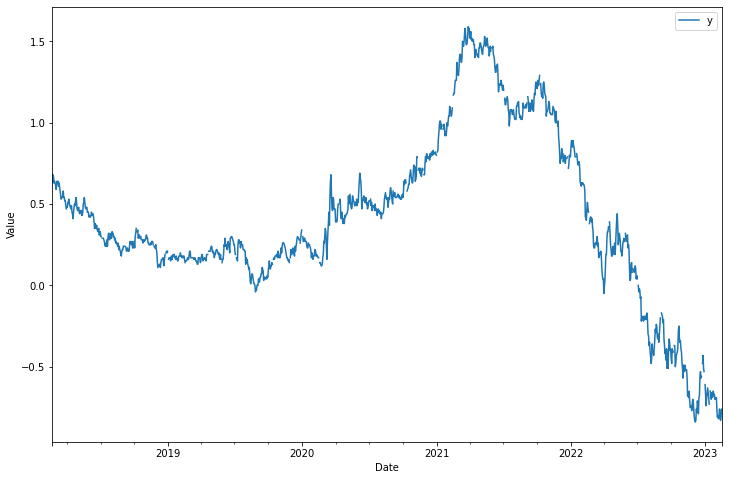

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Value')
ax.set_xlabel('Date')

plt.show()

The data has a clear trend

**Split the data into training and testing sets**

In [ ]:
# Define the test period as the last year of data
test_period_end = df['ds'].max()
test_period_start = test_period_end - DateOffset(years=1)

In [ ]:
# Split the data into train and test sets
train_df = df[df['ds'] < test_period_start]
test_df = df[df['ds'] >= test_period_start]

**Create and fit the Prophet model**

In [ ]:
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2f64tcod/h6lnkwoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2f64tcod/mmzv82nf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38607', 'data', 'file=/tmp/tmp2f64tcod/h6lnkwoa.json', 'init=/tmp/tmp2f64tcod/mmzv82nf.json', 'output', 'file=/tmp/tmp2f64tcod/prophet_modelrb4cuj00/prophet_model-20230222141516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Generate predictions the test data and  for the next  35 days ~ 1 month**

In [ ]:
# Make predictions for the test data
future  = model.make_future_dataframe(periods=400)
test_forecast = model.predict(future.loc[future['ds'] >= test_period_start])

In [ ]:
future.max()

ds   2023-03-23
dtype: datetime64[ns]

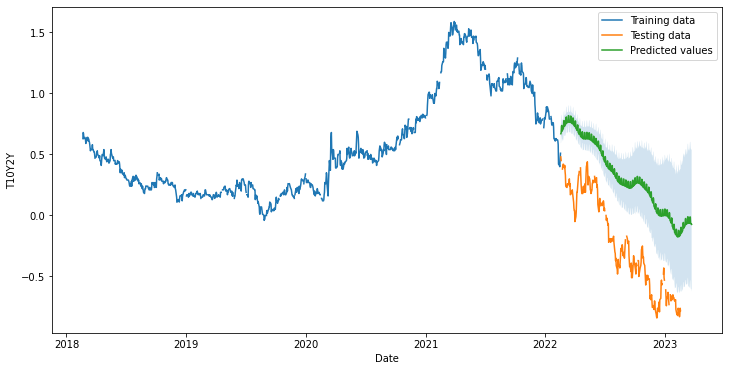

In [ ]:
# Plot the actual and predicted values for the test data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_df['ds'], train_df['y'], label='Training data')
ax.plot(test_df['ds'], test_df['y'], label='Testing data')
ax.plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted values')
ax.fill_between(test_forecast['ds'], test_forecast['yhat_lower'], test_forecast['yhat_upper'], alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('T10Y2Y')
ax.legend()
plt.show()

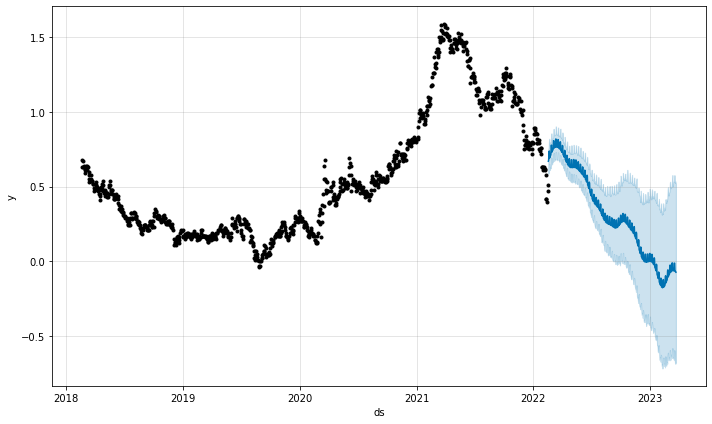

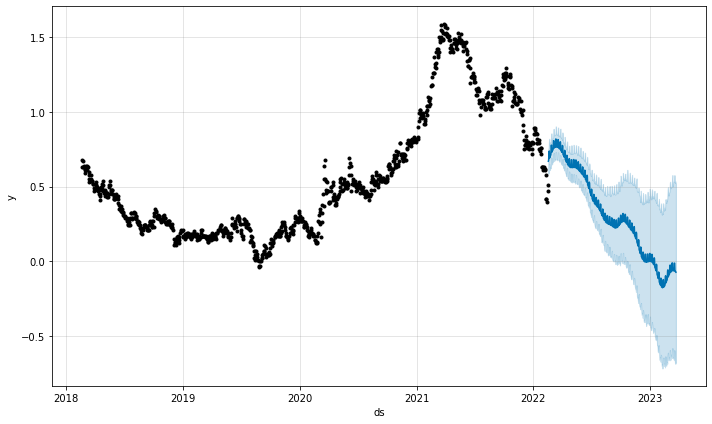

In [ ]:
model.plot(test_forecast, uncertainty=True)

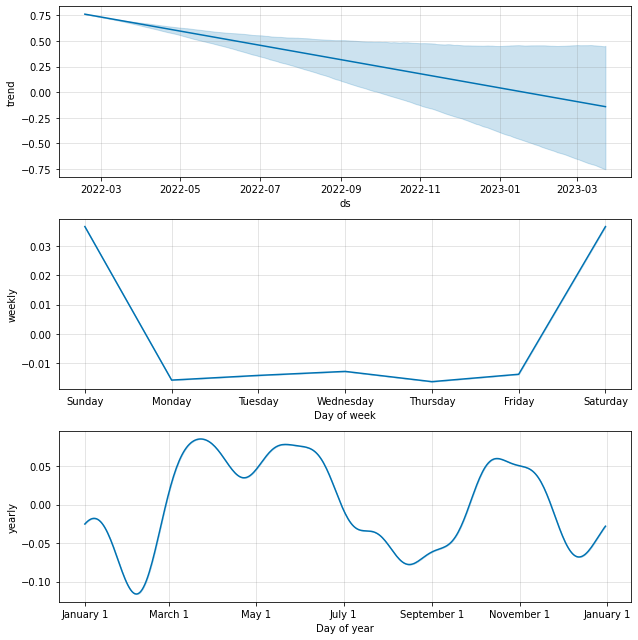

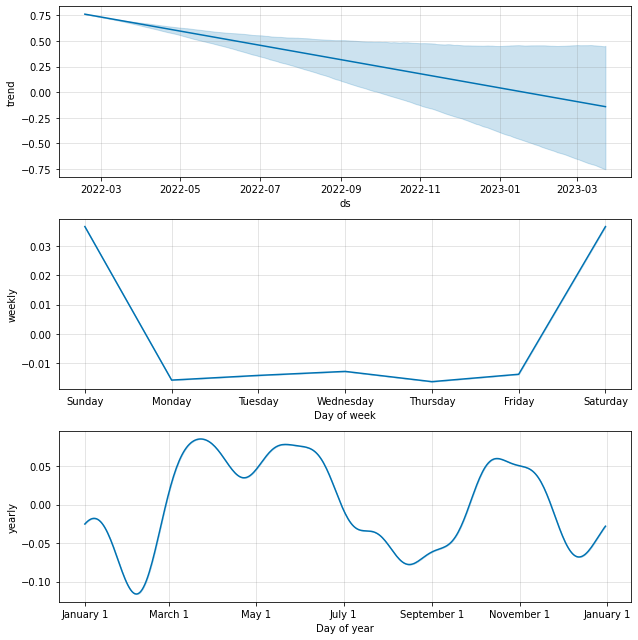

In [ ]:
model.plot_components(test_forecast)

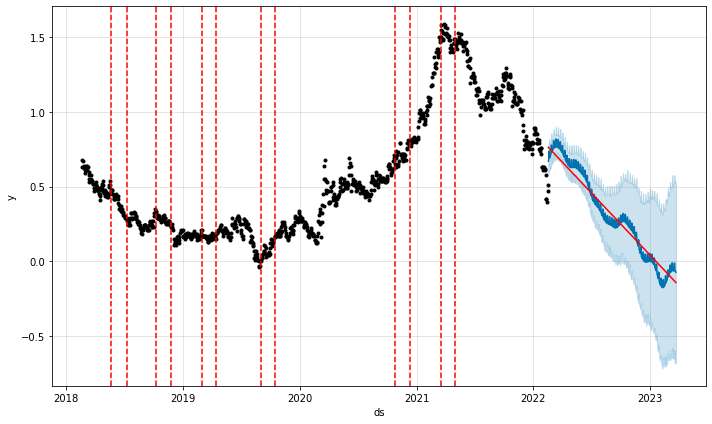

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(test_forecast)
a = add_changepoints_to_plot(fig.gca(), model, test_forecast)

**Conclusion**

The model, in principle, repeats the general trend of the model; there are errors in the values.
Perhaps the model is not capable of capturing complex patterns in the data, or that the model's hyperparameters need to be adjusted to better fit the data. It may also be that the time series is affected by external factors that the model cannot take into account